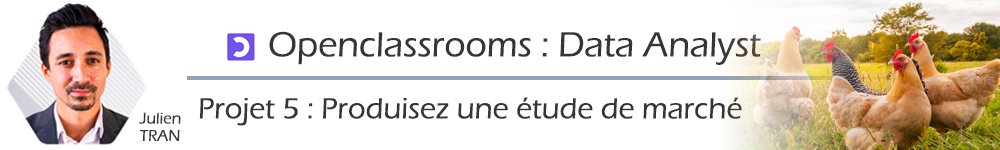

### Evolution de la disponibilité alimentaire de viande dans le monde

### Sommaire 🐔

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des différentes tables](#3)
    * [3.1.Valeurs manquantes, nulles et NA](#3.1)
    * [3.2.Doublons](#3.2)
    * [3.3.Outliers, valeurs abberantes et atypiques](#3.3)
* [4.Manipulations des tables](#4)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Je definis le nombre de lignes max affichées sur None

pd.set_option("max_rows", None) 
pd.set_option("display.precision",6)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv

Dispo_alim_viande_monde = pd.read_csv("C:/Users/33643/Desktop/P5/CSV/Dispo_alim_viande_monde.csv")
Prod_viande_monde = pd.read_csv("C:/Users/33643/Desktop/P5/CSV/Prod_viande_monde.csv")

#J'affiche une phrase si l'import est reussi

print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.Nettoyage des différentes tables <a class="anchor" id="3"></a>

## 3.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1"></a>

In [3]:
print(Prod_viande_monde.isnull().values.any())
print(Prod_viande_monde.isnull().values.sum())

print(Dispo_alim_viande_monde.isnull().values.any())
print(Dispo_alim_viande_monde.isnull().values.sum())

False
0
False
0


## 3.2.Doublons <a class="anchor" id="3.2"></a>

In [8]:
print(Prod_viande_monde.duplicated().any())
print(Dispo_alim_viande_monde.duplicated().any())

False
False


## 3.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.3"></a>

In [9]:
Prod_viande_monde.describe()

,Année,Quantité en millions de tonnes
count,25.000000,25.000000
mean,2016.000000,65.470080
std,1.443376,50.025835
min,2014.000000,5.191000
25%,2015.000000,14.546000
50%,2016.000000,68.159000
75%,2017.000000,118.642000
max,2018.000000,125.824000


In [10]:
Dispo_alim_viande_monde.describe()

,Code zone (FAO),Code ?l?ment,Code Produit,Code ann?e,Ann?e,Valeur
count,30.0,30.0,30.000000,30.00000,30.00000,30.000000
mean,5000.0,645.0,2768.000000,2016.00000,2016.00000,14.119667
std,0.0,0.0,79.611124,1.43839,1.43839,14.099753
min,5000.0,645.0,2731.000000,2014.00000,2014.00000,0.740000
25%,5000.0,645.0,2732.000000,2015.00000,2015.00000,1.970000
50%,5000.0,645.0,2733.500000,2016.00000,2016.00000,12.020000
75%,5000.0,645.0,2735.000000,2017.00000,2017.00000,15.467500
max,5000.0,645.0,2943.000000,2018.00000,2018.00000,42.870000


## 4.Manipulation des tables <a class="anchor" id="4"></a>

In [4]:
Prod_viande_monde.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),5000,Monde,5511,Production,2731,Viande de Bovins,2014,2014,Milliers de tonnes,68047,A,"Agr?gat, peut inclure des donn?es officielles,..."
1,FBS,Bilans Alimentaires (2014-),5000,Monde,5511,Production,2731,Viande de Bovins,2015,2015,Milliers de tonnes,67560,A,"Agr?gat, peut inclure des donn?es officielles,..."
2,FBS,Bilans Alimentaires (2014-),5000,Monde,5511,Production,2731,Viande de Bovins,2016,2016,Milliers de tonnes,68159,A,"Agr?gat, peut inclure des donn?es officielles,..."
3,FBS,Bilans Alimentaires (2014-),5000,Monde,5511,Production,2731,Viande de Bovins,2017,2017,Milliers de tonnes,69301,A,"Agr?gat, peut inclure des donn?es officielles,..."
4,FBS,Bilans Alimentaires (2014-),5000,Monde,5511,Production,2731,Viande de Bovins,2018,2018,Milliers de tonnes,71343,A,"Agr?gat, peut inclure des donn?es officielles,..."


In [5]:
#Je nettoie ma table en droppant la chine et en retirant quelques colonnes

Prod_viande_monde = Prod_viande_monde.drop(columns =['?l?ment','Code Domaine','Domaine','Code zone (FAO)','Zone','Code ?l?ment','Code Produit','Code ann?e','Symbole','Description du Symbole'])
Prod_viande_monde = Prod_viande_monde.rename(columns ={'Unit?':'Unité'})
Prod_viande_monde = Prod_viande_monde.rename(columns ={'Ann?e':'Année'})
Prod_viande_monde['Valeur'] = Prod_viande_monde['Valeur']*1000
Prod_viande_monde['Valeur'] = Prod_viande_monde['Valeur']/1000000
Prod_viande_monde = Prod_viande_monde.rename(columns ={'Valeur':'Quantité en millions de tonnes'})
Prod_viande_monde = Prod_viande_monde.drop(columns =['Unité'])

Prod_viande_monde

,Produit,Année,Quantité en millions de tonnes
0,Viande de Bovins,2014,68.047
1,Viande de Bovins,2015,67.560
2,Viande de Bovins,2016,68.159
3,Viande de Bovins,2017,69.301
4,Viande de Bovins,2018,71.343
5,Viande d'Ovins/Caprins,2014,14.162
6,Viande d'Ovins/Caprins,2015,14.546
7,Viande d'Ovins/Caprins,2016,14.814
8,Viande d'Ovins/Caprins,2017,14.891
9,Viande d'Ovins/Caprins,2018,15.167


In [6]:
Prod_viande_monde_means = Prod_viande_monde.groupby('Produit').mean()
Prod_viande_monde_means

,Année,Quantité en millions de tonnes
Produit,,
Viande d'Ovins/Caprins,2016,14.7160
Viande de Bovins,2016,68.8820
Viande de Volailles,2016,119.5126
Viande de porcins,2016,118.9338
"Viande, Autre",2016,5.3060


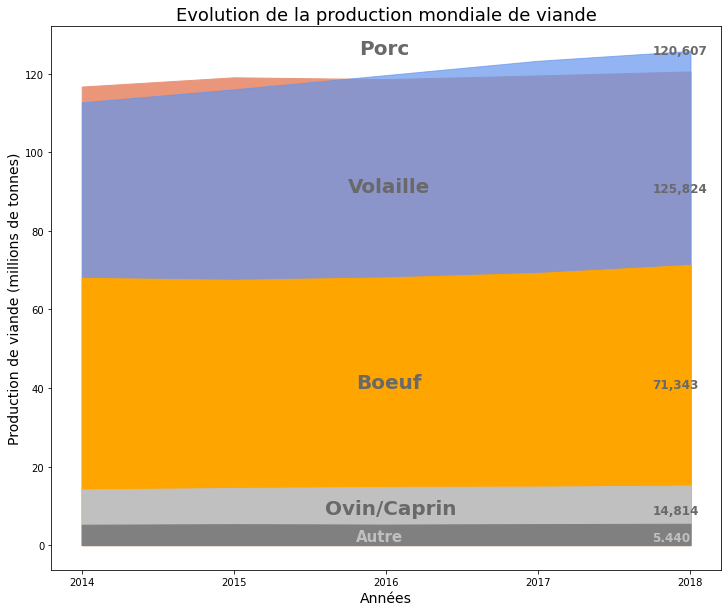

In [7]:
x=[2014,2015,2016,2017,2018]
y1=[68.047,67.560,68.159,69.301,71.343]
y2=[14.162,14.546,14.814,14.891,15.167]
y3=[116.746,119.096,118.642,119.578,120.607]
y4=[112.718,116.034,119.670,123.317,125.824]
y5=[5.191,5.329,5.226,5.344,5.440]

fig, ax = plt.subplots(figsize=(12, 10))

# Area plot
plt.fill_between(x, y3, label='Porc',color="darksalmon")
plt.fill_between(x, y4, label='Volaille',color="cornflowerblue",alpha=0.7)
plt.fill_between(x, y1,label='Boeuf',color="orange")
plt.fill_between(x, y2,label='Ovin/Caprin',color="silver")
plt.fill_between(x, y5,label='Autre',color="grey")

plt.text(2015.8, 40, 'Boeuf', fontsize=20, color='dimgrey',weight='bold')
plt.text(2015.75, 90, 'Volaille', fontsize=20, color='dimgrey',weight='bold')
plt.text(2015.82, 125, 'Porc', fontsize=20, color='dimgrey',weight='bold')
plt.text(2015.6, 8, 'Ovin/Caprin', fontsize=20, color='dimgrey',weight='bold')
plt.text(2015.8, 1,'Autre', fontsize=15, color='silver',weight='bold')

plt.text(2017.75, 40, '71,343', fontsize=12, color='dimgrey',weight='bold')
plt.text(2017.75, 90, '125,824', fontsize=12, color='dimgrey',weight='bold')
plt.text(2017.75, 125, '120,607', fontsize=12, color='dimgrey',weight='bold')
plt.text(2017.75, 8, '14,814', fontsize=12, color='dimgrey',weight='bold')
plt.text(2017.75, 1, '5.440', fontsize=12, color='silver',weight='bold')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Années", size=14)
plt.ylabel("Production de viande (millions de tonnes)", size=14)
plt.title("Evolution de la production mondiale de viande", size=18)

#plt.legend()

plt.show()